In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
X = pd.read_csv('test/mushroom/training_mush.csv')

In [5]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [8]:
X_train = X.drop('class', axis=1)
y_train = X['class']

In [12]:
rf = RandomForestClassifier(random_state=0)

In [13]:
params = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 12, 2),
          'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 9, 2)}

In [14]:
search = GridSearchCV(rf, params, cv=3, n_jobs=-1)

In [15]:
search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 51, 10)})

In [16]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

---
Важность атрибутов

In [18]:
feature_importances = search.best_estimator_.feature_importances_

In [32]:
fi_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})\
          .sort_values('feature_importances', ascending=False)

Text(0.5, 1.0, 'Важность атрибутов')

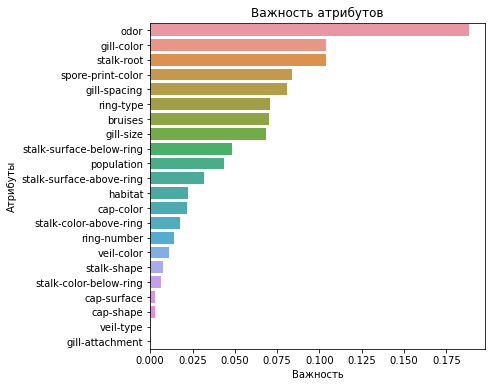

In [34]:
f, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=fi_df.feature_importances, y=fi_df.features)
plt.xlabel('Важность')
plt.ylabel('Атрибуты')
plt.title('Важность атрибутов')

---
predict

In [36]:
X_test = pd.read_csv('test/mushroom/testing_mush.csv')

In [37]:
best_rf = search.best_estimator_

In [38]:
y_pred = best_rf.predict(X_test)

In [40]:
y_pred.sum()

976

In [41]:
y_pred.size

2031

---
confusion matrix

In [45]:
y_true = pd.read_csv('test/mushroom/testing_y_mush.csv')

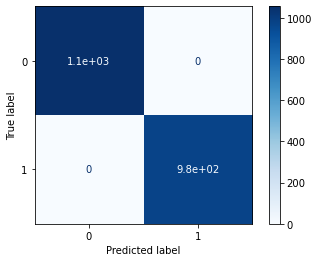

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_rf, X_test, y_true, cmap=plt.cm.Blues, values_format='.2g')

<AxesSubplot:>

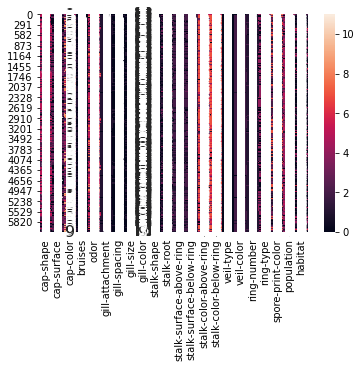

In [47]:
sns.heatmap(X_train, annot=True,annot_kws={"size": 16})